mean = -1.0286291926748328
mean = -0.5074721014446656
mean = -1.5507818273491125e-07
mean = 0.49209010752997917
mean = 0.9677022757823258


<ipython-input-2-598d4a09701d>:23: UserWarning: Attempting to set identical bottom == top == 0.49209010752997917 results in singular transformations; automatically expanding.
  ax2.set_ylim((np.min(energy2), np.max(energy2)))


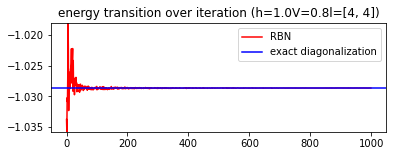

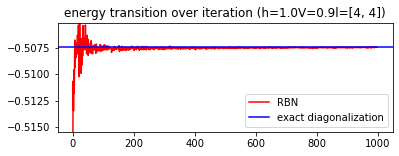

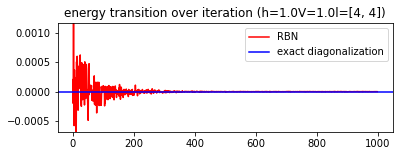

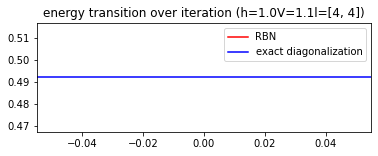

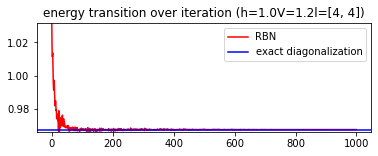

In [2]:
import numpy as np
import json
from matplotlib import pyplot as plt

# filename1 = 'h=1.0V=1.0l=[4, 4].log'

exact_energy = [-1.028629, -0.507427, 0, 0.492100, 0.967703]
vs = [0.8, 0.9, 1.0, 1.1, 1.2]
for v, e in zip(vs, exact_energy):
    filename2 = f'h=1.0V={v}l=[4, 4].log'
    data2=json.load(open("../log/"+filename2))["Output"]
    
    energy2 = []
    for i, d_ in enumerate(data2):
        energy2.append(d_['Energy']["Mean"])

    iters = np.arange(0, len(energy2))
    
    fig, ax2 = plt.subplots(1,figsize=(6, 2))
    ax2.set_title(f"energy transition over iteration (h=1.0V={v}l=[4, 4])")
    ax2.plot(iters, energy2, color='red', label='RBN')
    ax2.axhline(y=e, color='b',label="exact diagonalization")
    ax2.set_ylim((np.min(energy2), np.max(energy2)))
    ax2.legend()
    plt.savefig(f"image_V={v}.png")
    
    print(f'mean = {np.mean(energy2[-200:])}')

In [3]:
import sys
import importlib
importlib.reload(sys)
sys.path.insert(0,'../')
import numpy as np
import netket as nk
from scripts import functions as f
from scripts import new_dynamics, new_dynamics2
import os
currentpath = os.getcwd()
parentdir = os.path.dirname(currentpath)
from conf import *

length = [4,4]
hex_ = nk.machine.new_hex(np.array(length))
t_list = np.arange(0,20,0.1)

### Plot dimer_momentum 

In [66]:
dimer = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/dimer_real_mean_1.0e+05.npy")
dimer_momentum = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/dimer_momentum_mean_1.0e+05.npy")
Vison = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/vison_real_mean_1.0e+05.npy")
Vison_momentum = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/vison_momentum_mean_1.0e+05.npy")


In [67]:
from matplotlib import pyplot as plt

from scipy.stats import linregress
def fit(x, y, w):
    
    L = x.shape[0]
    
    slope, intercept, r, p, se = linregress(x, y)
    
    return slope, intercept, r

### [4, 4]  v = 1.0

#### Dimer

<ipython-input-68-be6d00587661>:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



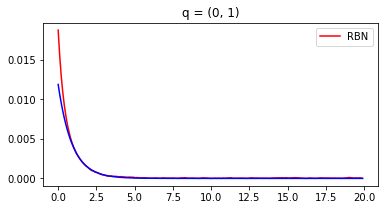

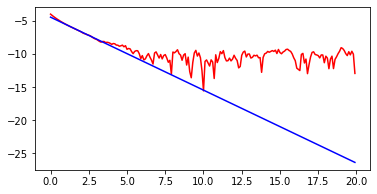

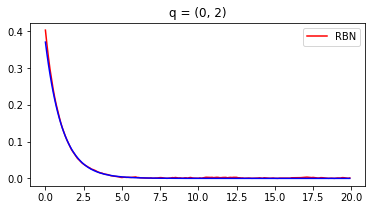

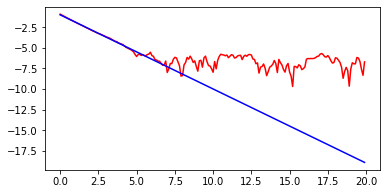

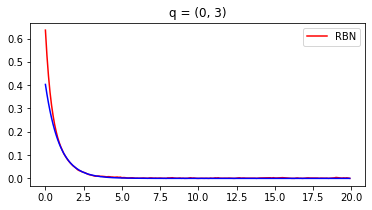

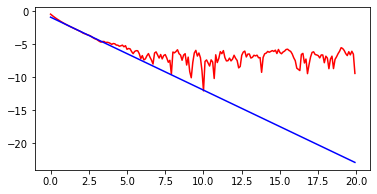

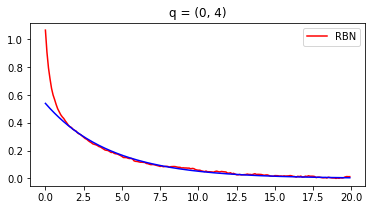

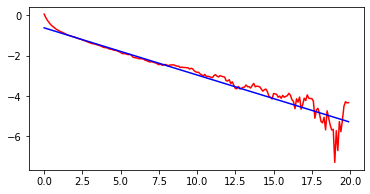

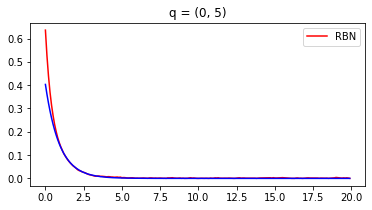

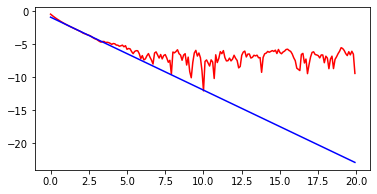

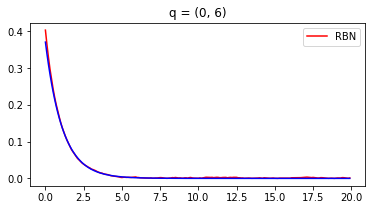

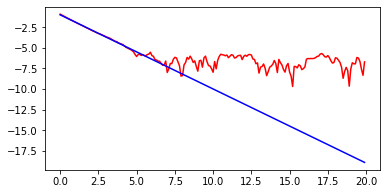

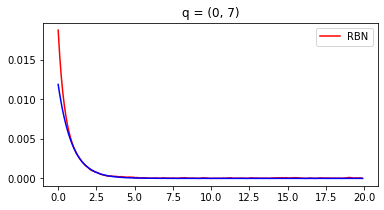

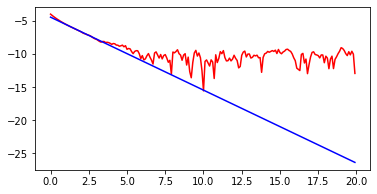

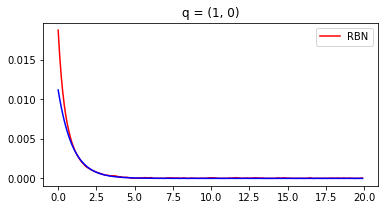

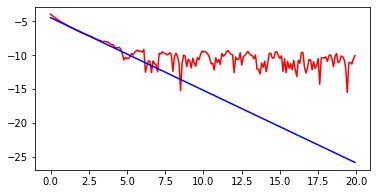

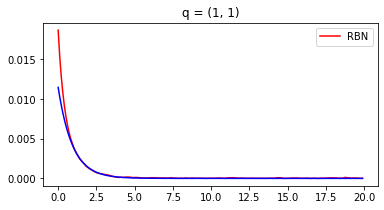

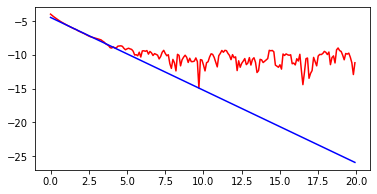

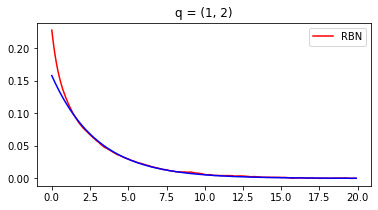

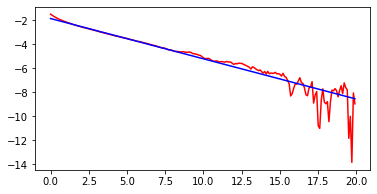

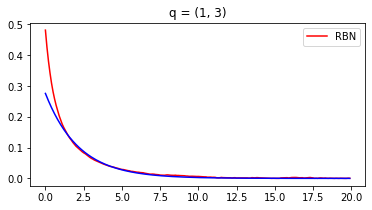

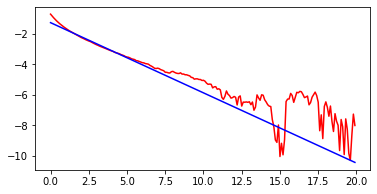

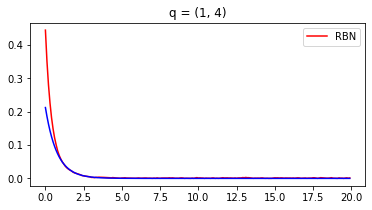

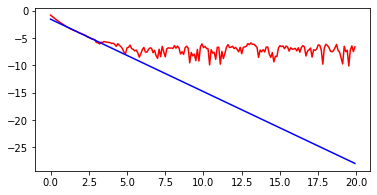

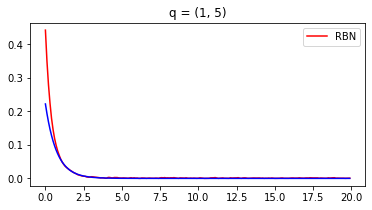

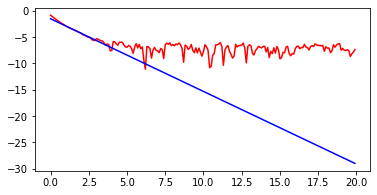

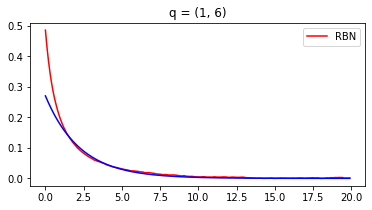

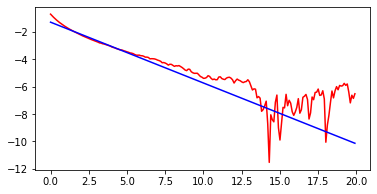

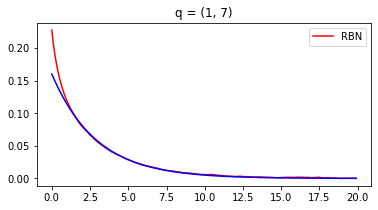

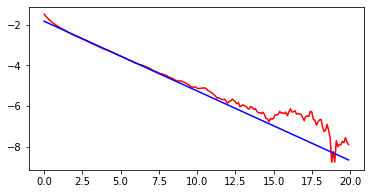

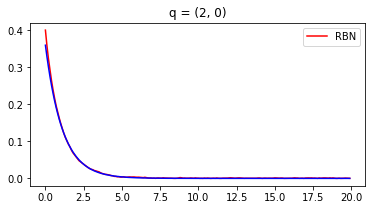

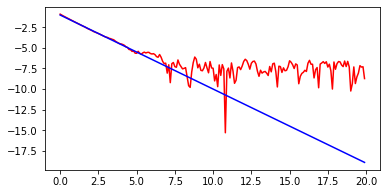

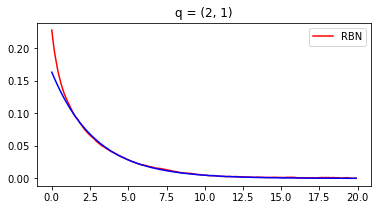

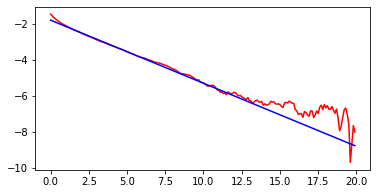

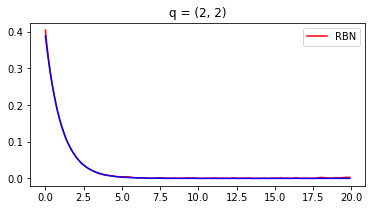

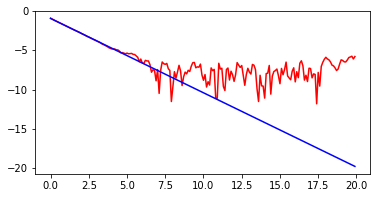

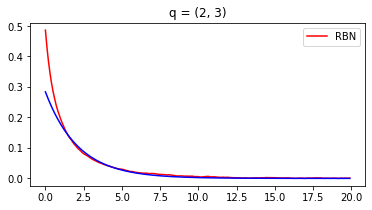

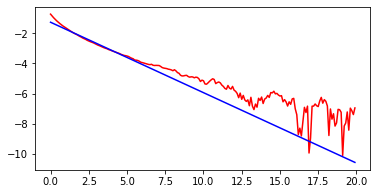

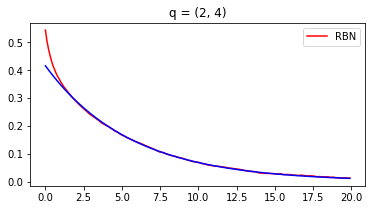

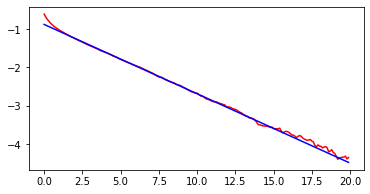

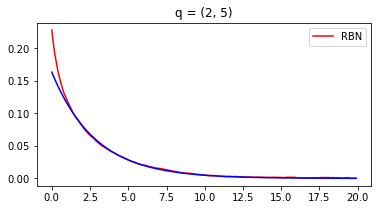

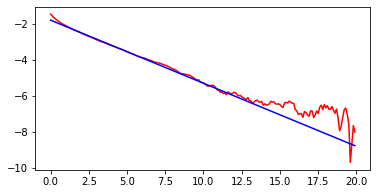

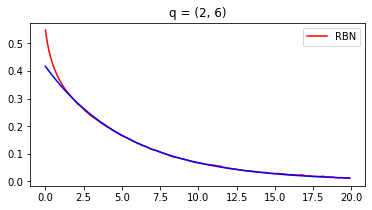

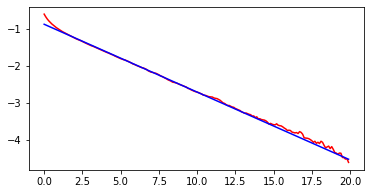

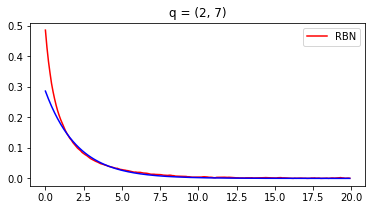

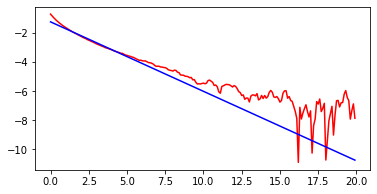

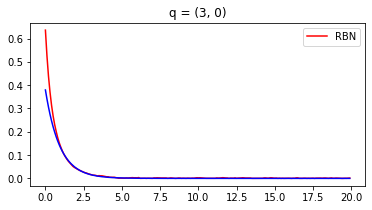

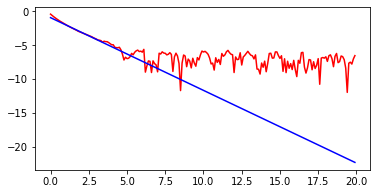

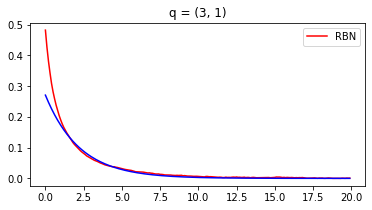

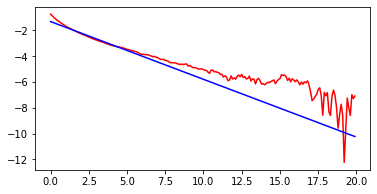

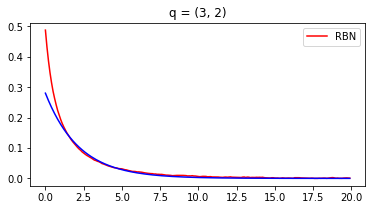

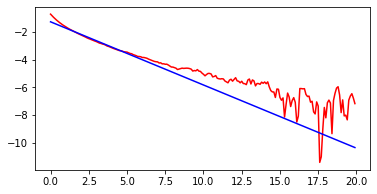

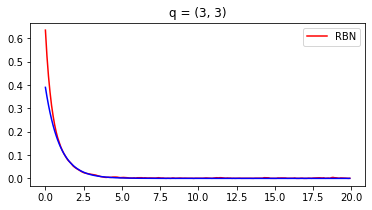

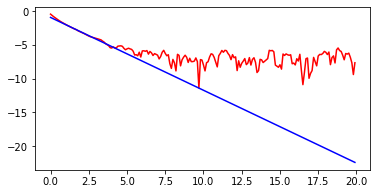

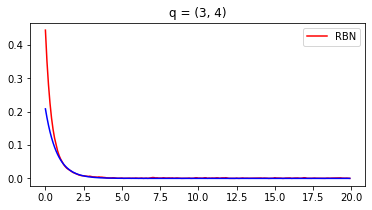

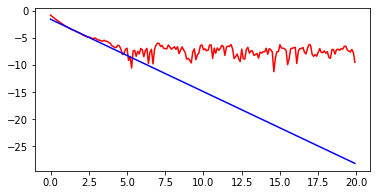

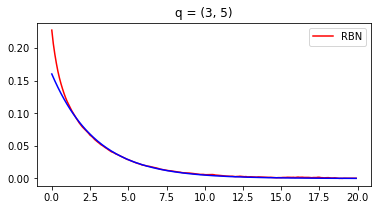

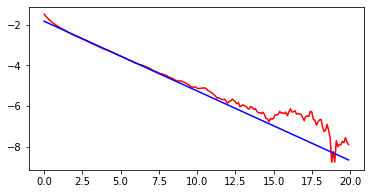

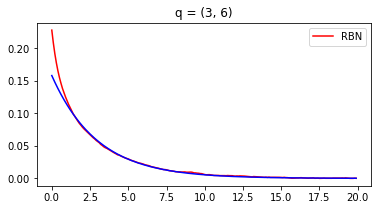

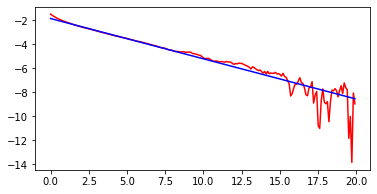

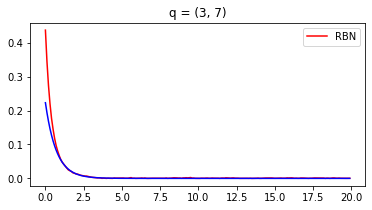

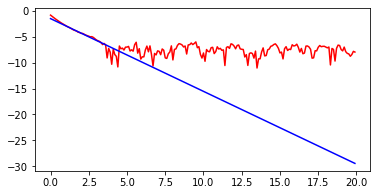

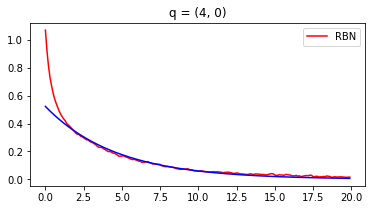

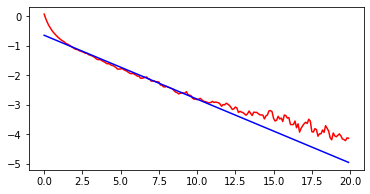

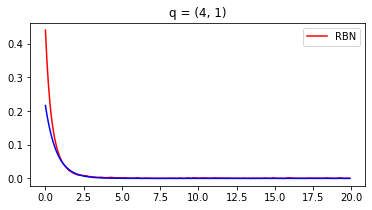

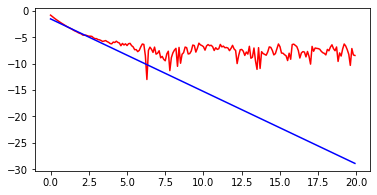

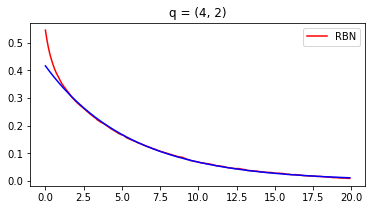

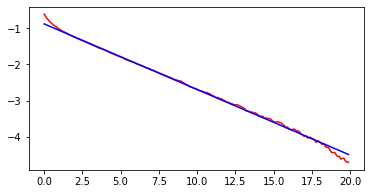

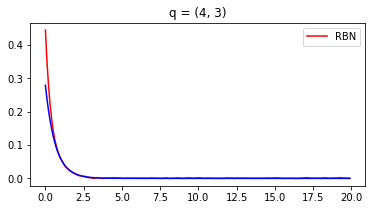

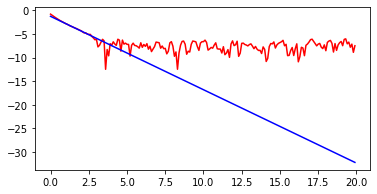

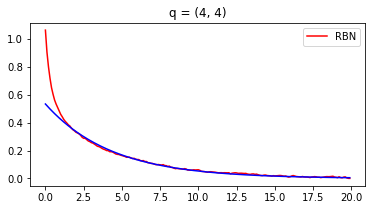

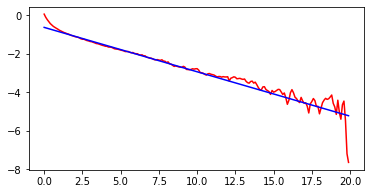

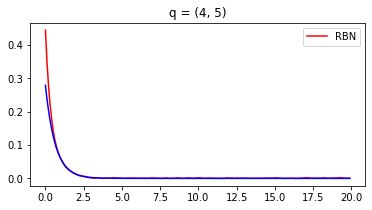

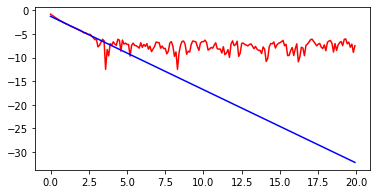

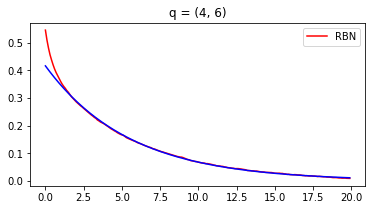

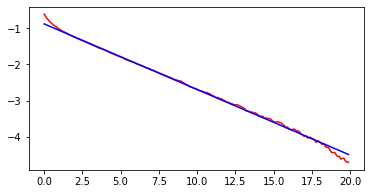

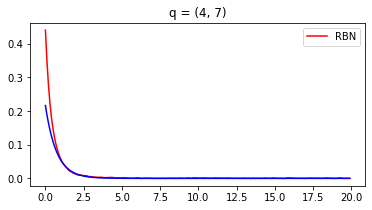

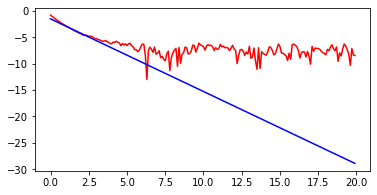

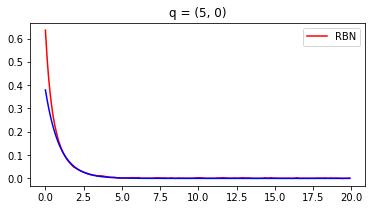

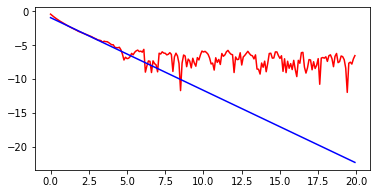

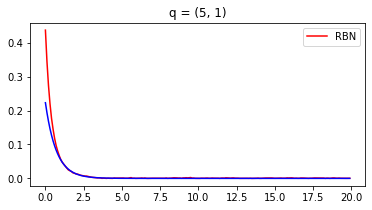

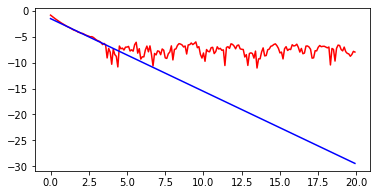

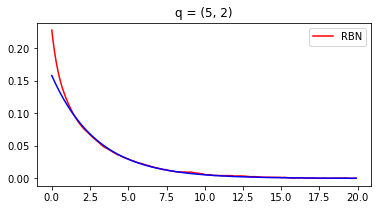

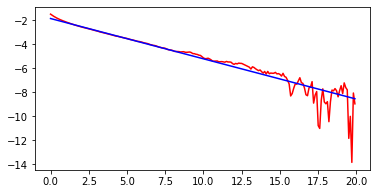

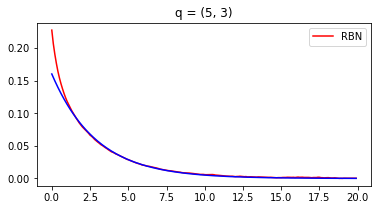

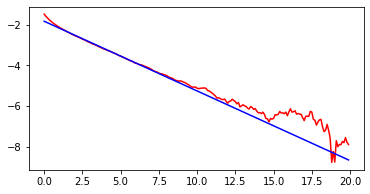

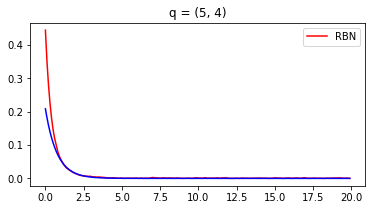

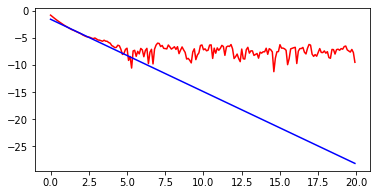

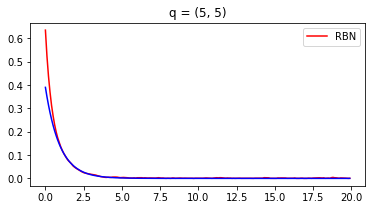

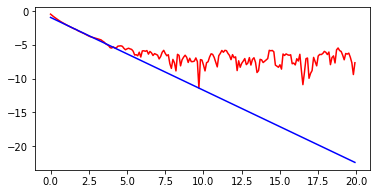

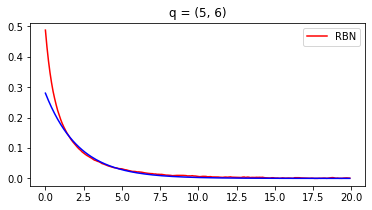

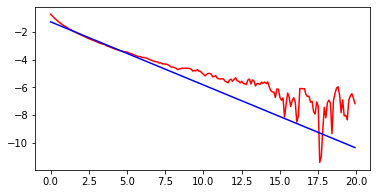

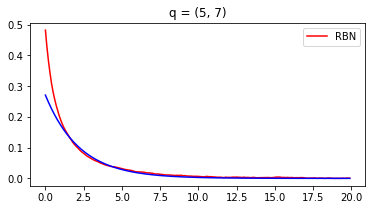

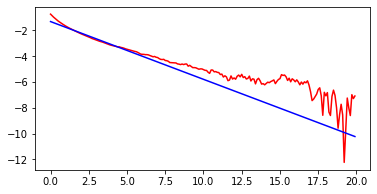

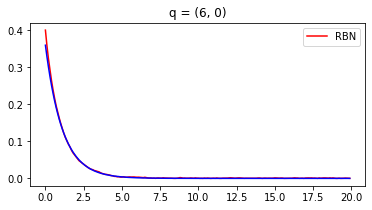

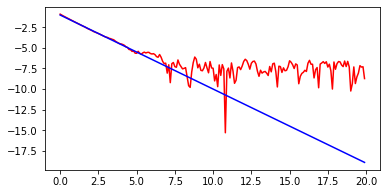

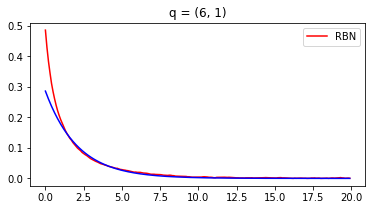

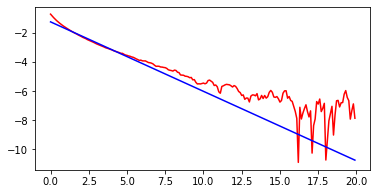

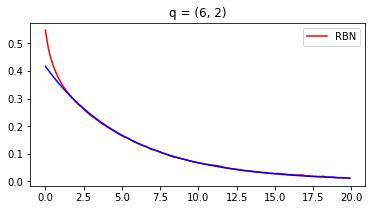

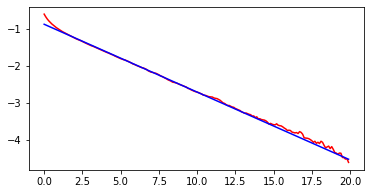

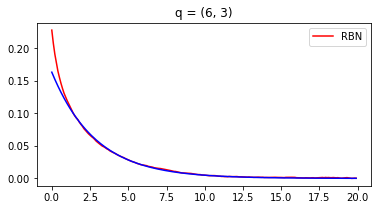

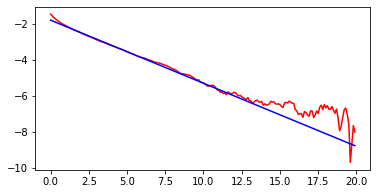

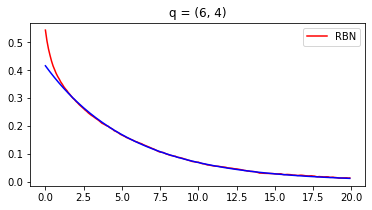

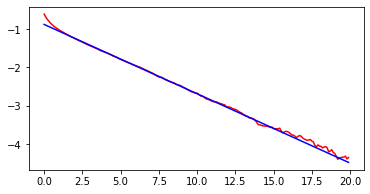

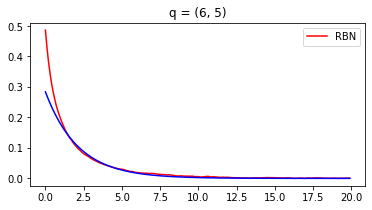

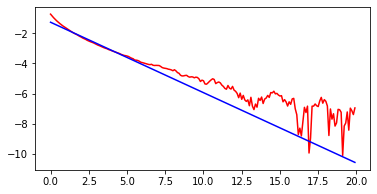

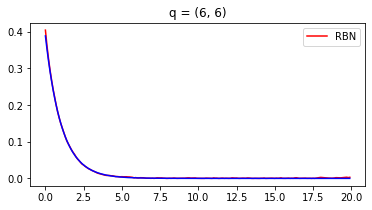

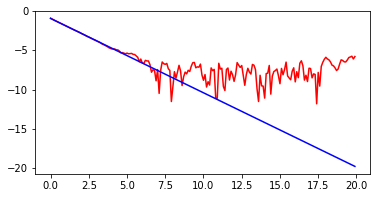

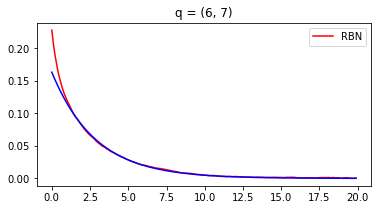

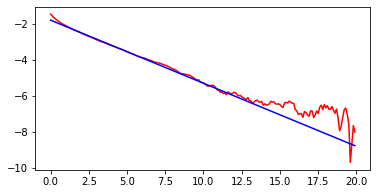

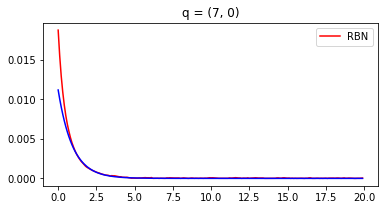

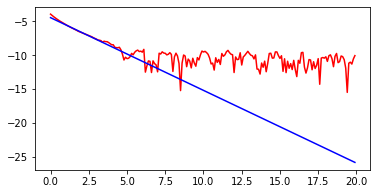

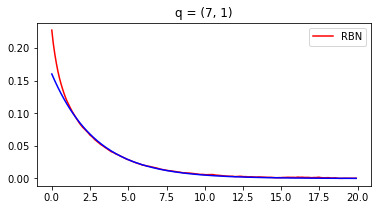

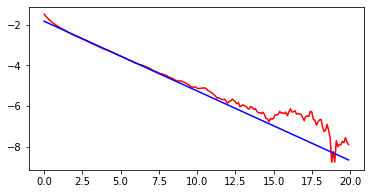

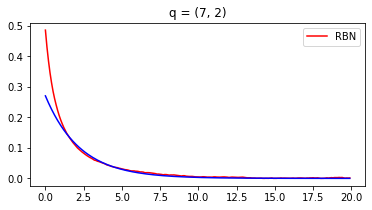

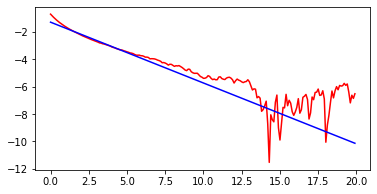

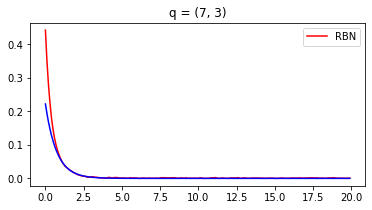

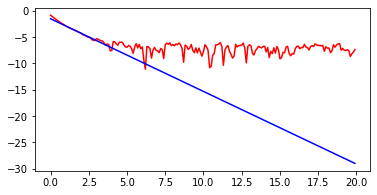

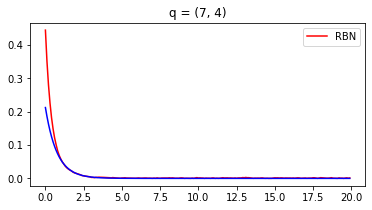

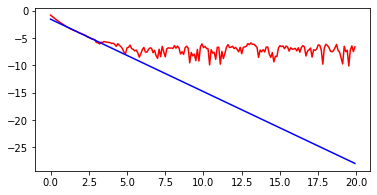

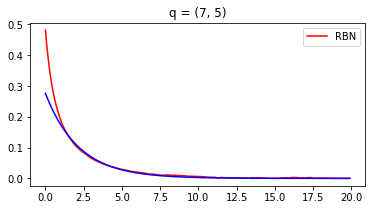

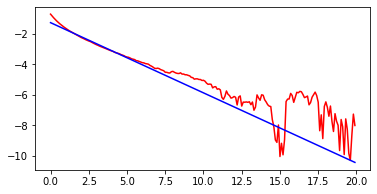

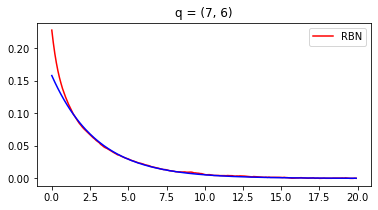

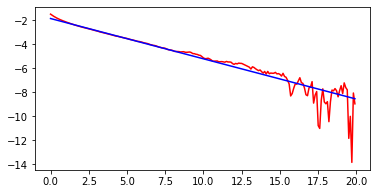

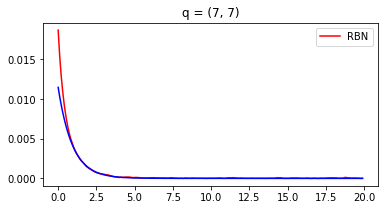

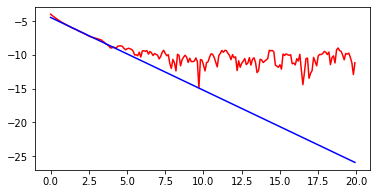

In [68]:
import scipy

fitting_energy = [-1]
index_list =[]
for i in range(8):
    for j in range(8):
        index = (i, j)
        if index == (0, 0):
            continue
        index_list.append(index)
        fig, ax = plt.subplots(1,figsize=(6, 3))
        
        ax.plot(t_list, np.abs(dimer_momentum[index].real), color='red', label='RBN')
        ax.set_title(f"q = {index}")
        ax.legend()
        params, _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  t_list[10:],  np.abs(dimer_momentum[index].real[10:]))
        ax.plot(t_list, params[0] * np.exp(-params[1]*t_list), color='blue', label='fitted')

        fig2, ax2 = plt.subplots(1,figsize=(6, 3))

        ax2.plot(t_list, np.log(np.abs(dimer_momentum[index].real)), color='red', label='RBN')
        ax2.plot(t_list, -params[1]*t_list + np.log(params[0]), color='blue', label = 'fitting')
        fitting_energy.append(params[1])
        


### 3D plots

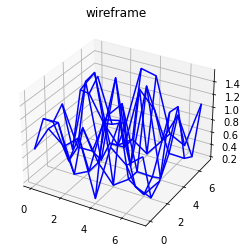

In [36]:
Z = np.array(fitting_energy).reshape(8,8)
Z[0,0] = np.mean(Z)
from matplotlib import cm

x = np.arange(0, 2*length[0])
y = np.arange(0, 2*length[1])

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('wireframe')
plt.show()

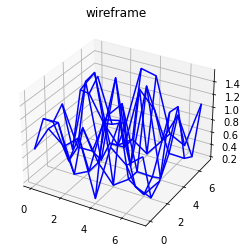

In [37]:
x = np.arange(0, 2*length[0])
y = np.arange(0, 2*length[1])

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('wireframe')
plt.show()

In [38]:
from plotly import graph_objects as go

layout3d = go.Layout(
#     autosize = True,
#     showlegend = False,
#     width=500,
#     height=700,
    scene=dict(
        aspectratio=dict(x=1, y=1, z=0.5),
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showticklabels = False, title = dict(text = ' ')),
        
    )
)

In [39]:
Z

array([[0.71320483, 1.10328332, 0.90097277, 1.1032836 , 0.23401201,
        1.1032836 , 0.90097277, 1.10328332],
       [1.07061148, 1.0778636 , 0.33599185, 0.45912046, 1.32523927,
        1.38010902, 0.44326039, 0.3429967 ],
       [0.89935634, 0.34978007, 0.9471711 , 0.46845583, 0.18061602,
        0.34978007, 0.18339749, 0.47619638],
       [1.07061172, 0.44864001, 0.45613948, 1.07786376, 1.33544659,
        0.34299671, 0.33599186, 1.40528339],
       [0.21638276, 1.37536847, 0.18155261, 1.55455635, 0.23084097,
        1.55455622, 0.18155261, 1.37536835],
       [1.0706117 , 1.40528348, 0.33599185, 0.34299672, 1.33544654,
        1.07786374, 0.45613948, 0.44864   ],
       [0.89935634, 0.47619636, 0.18339749, 0.34978007, 0.18061602,
        0.46845584, 0.9471711 , 0.34978007],
       [1.0706116 , 0.34299671, 0.4432604 , 1.380109  , 1.32523928,
        0.45912045, 0.33599185, 1.0778637 ]])

In [40]:
v = 1
name = f'v={v} l={length}'
fig = go.Figure(data=[go.Surface(z=Z, x=x, y=y)])
fig.update_layout(title=name, autosize=False,
                  width=700, height=700,)
fig.show()

### Vison

<ipython-input-33-2f18c710337a>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,figsize=(6, 3))


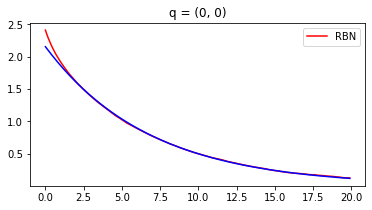

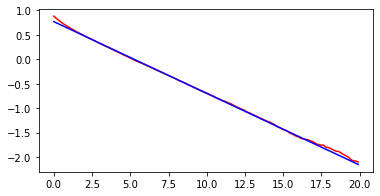

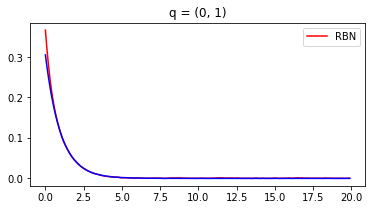

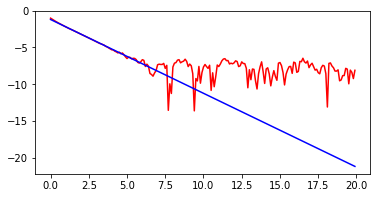

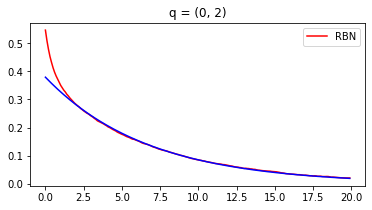

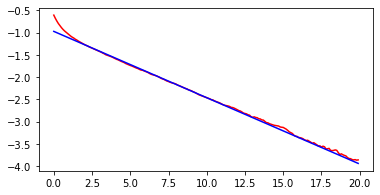

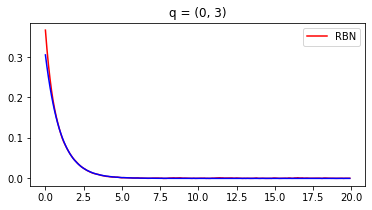

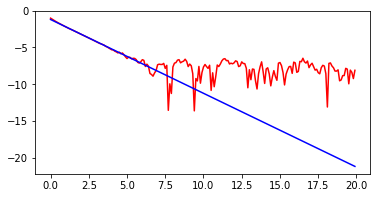

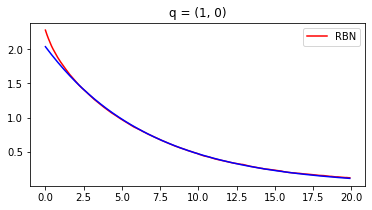

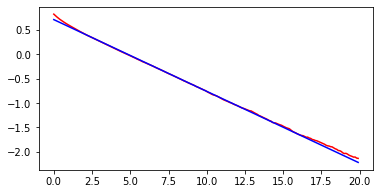

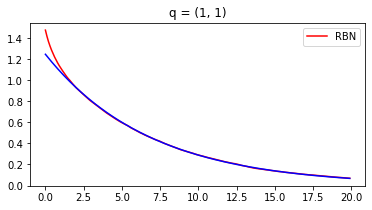

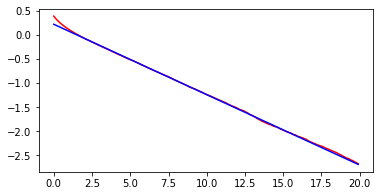

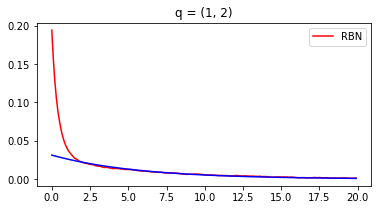

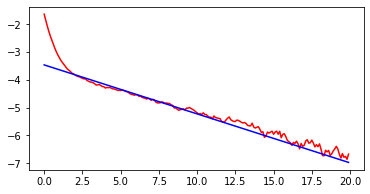

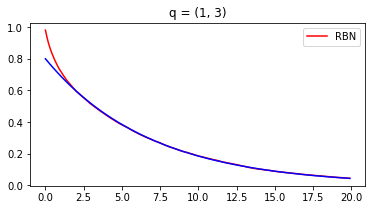

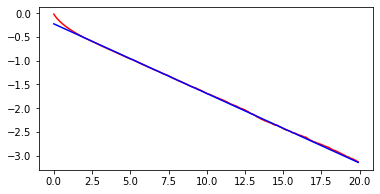

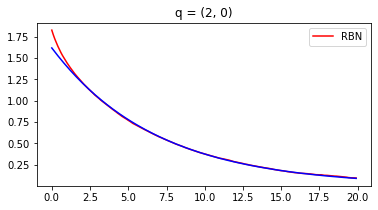

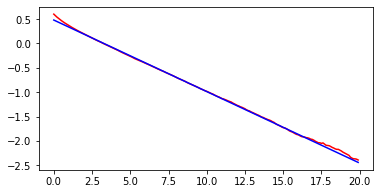

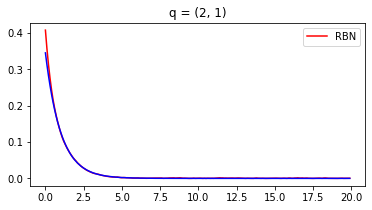

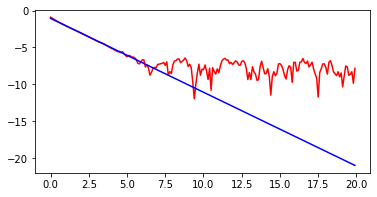

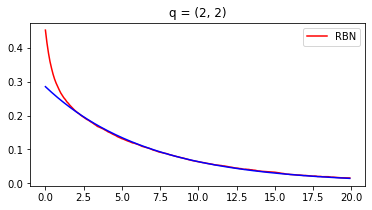

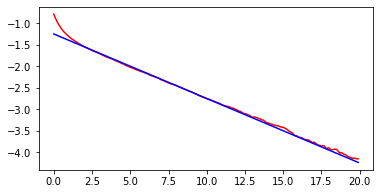

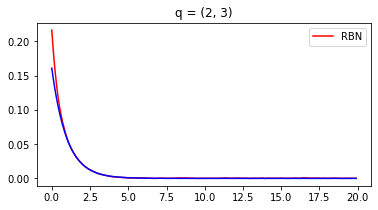

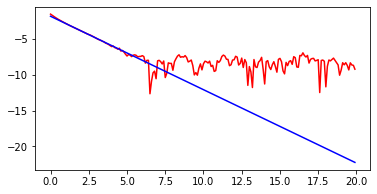

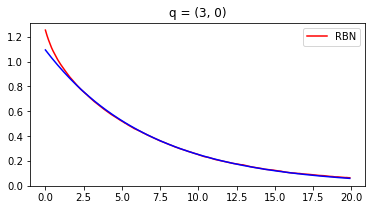

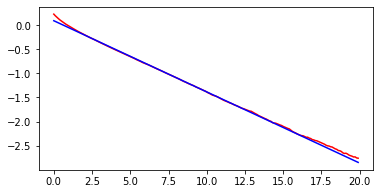

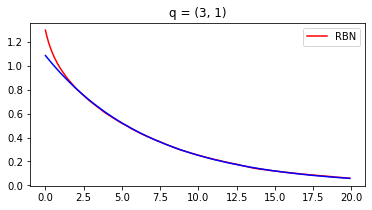

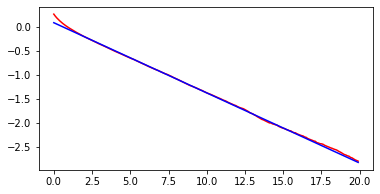

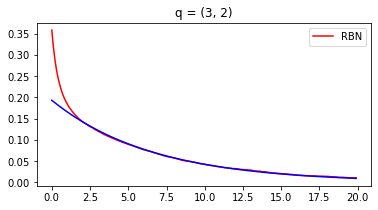

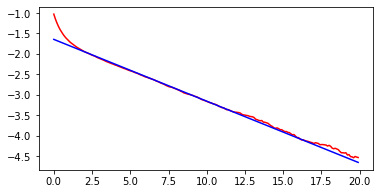

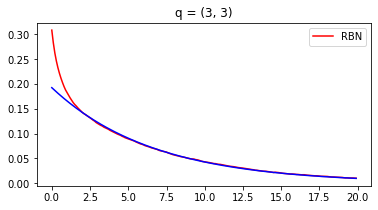

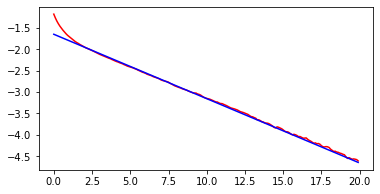

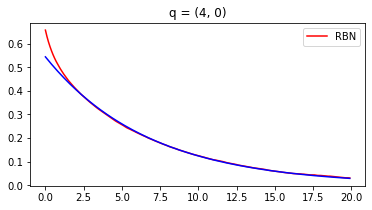

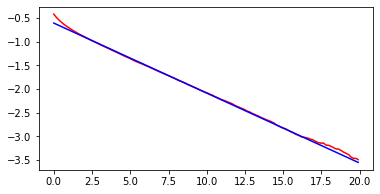

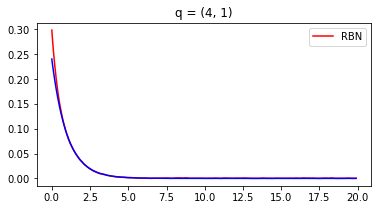

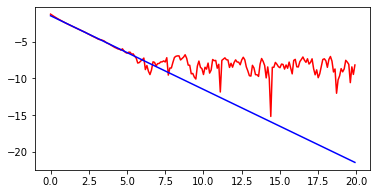

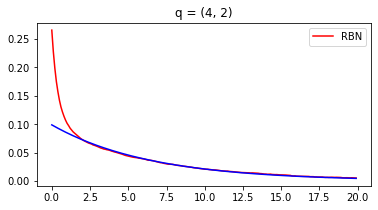

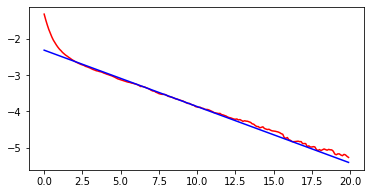

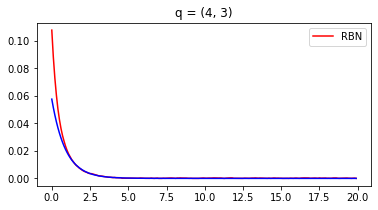

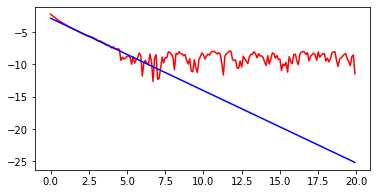

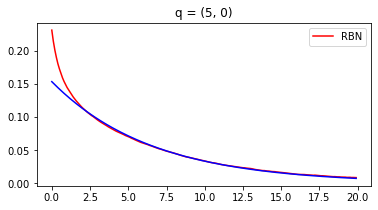

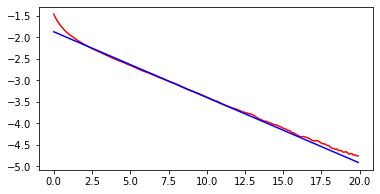

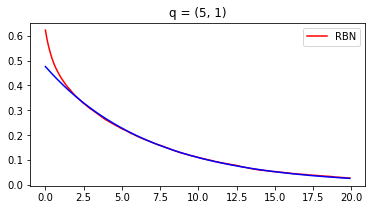

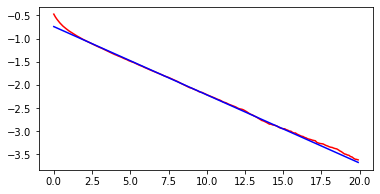

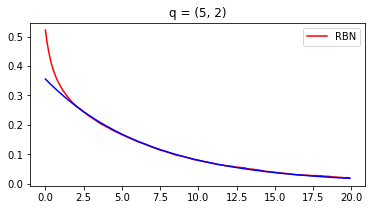

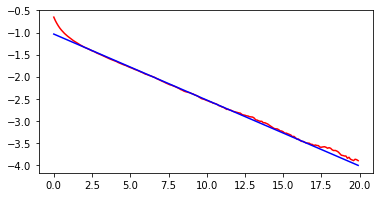

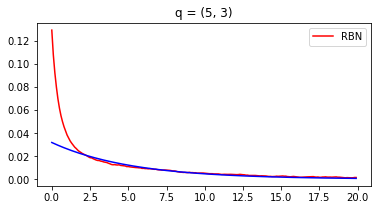

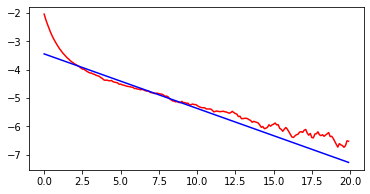

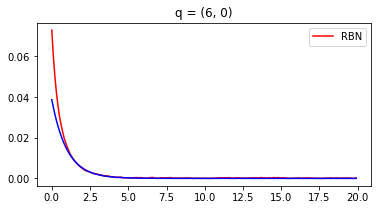

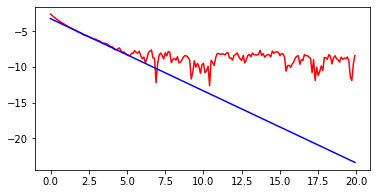

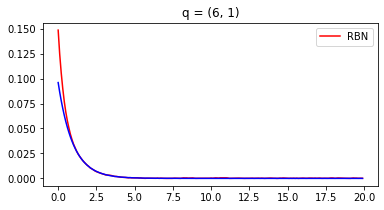

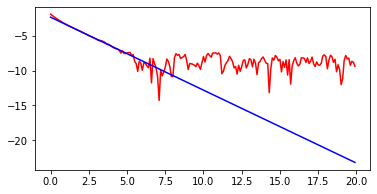

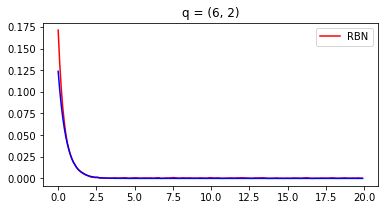

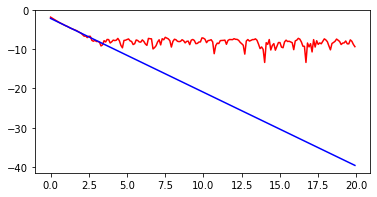

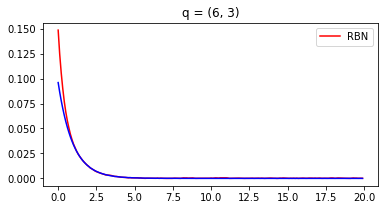

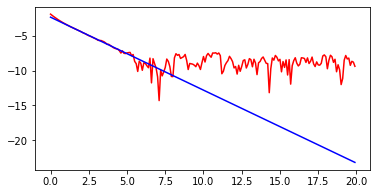

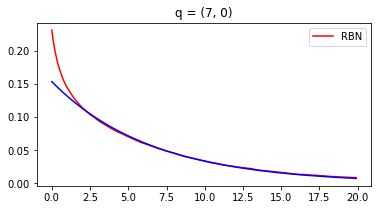

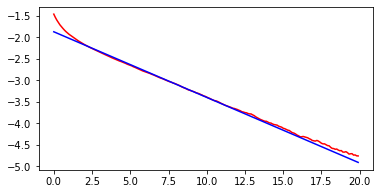

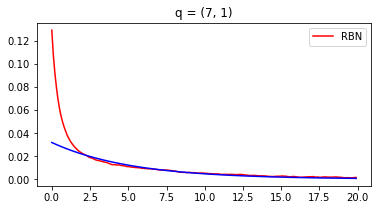

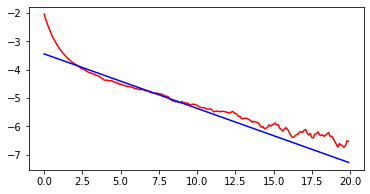

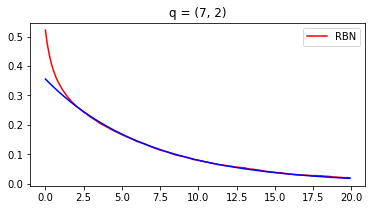

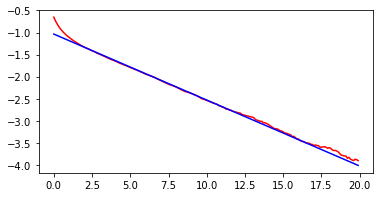

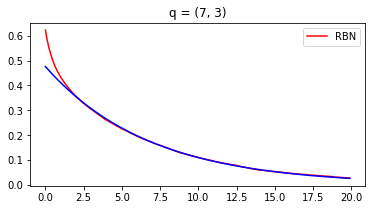

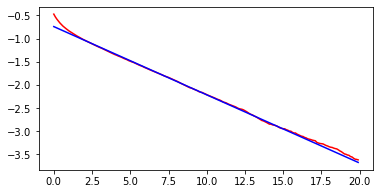

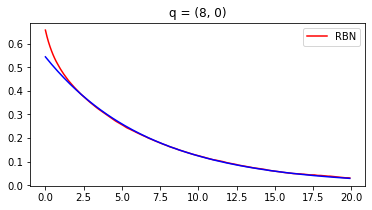

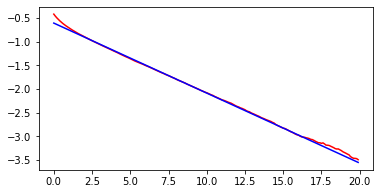

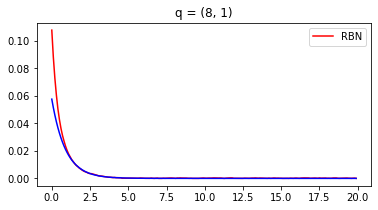

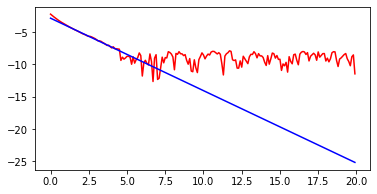

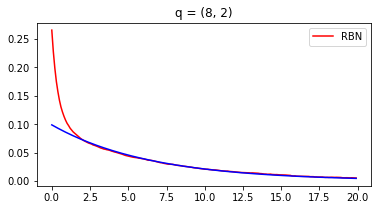

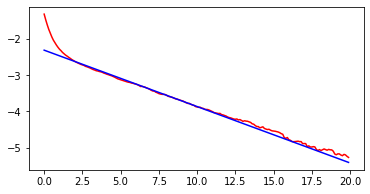

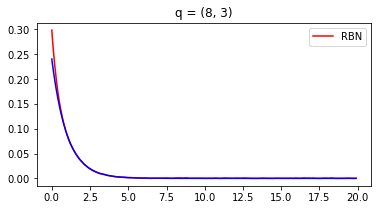

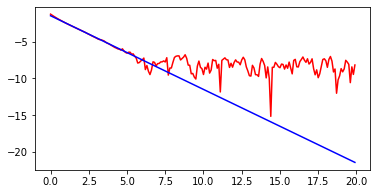

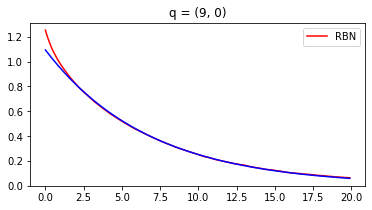

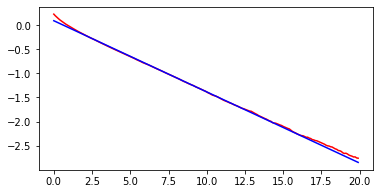

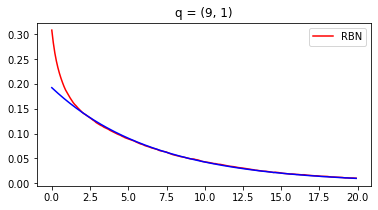

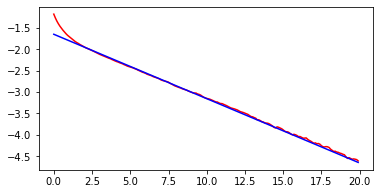

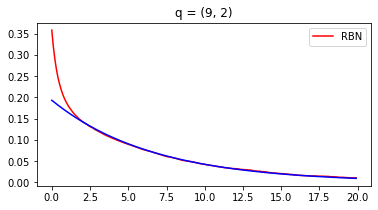

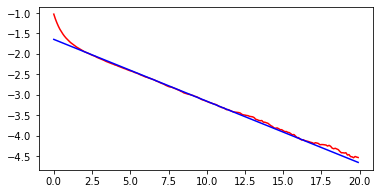

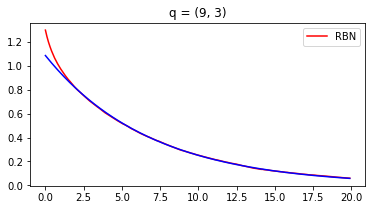

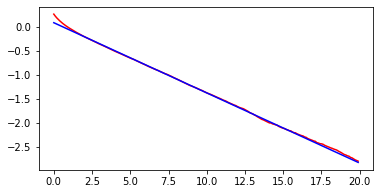

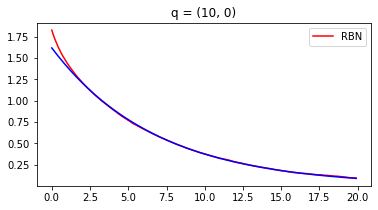

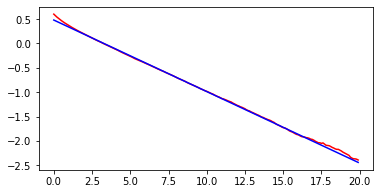

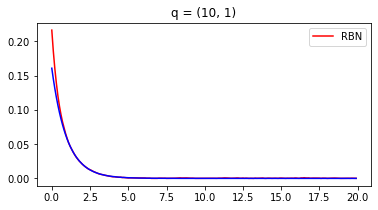

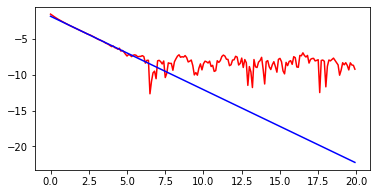

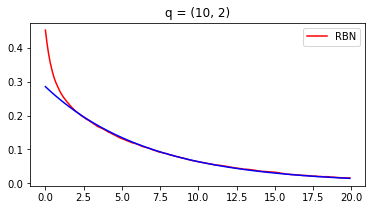

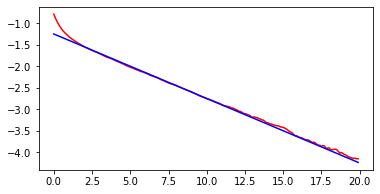

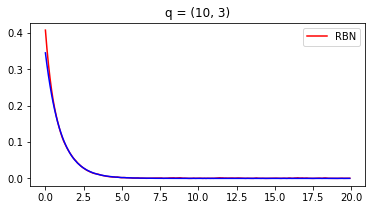

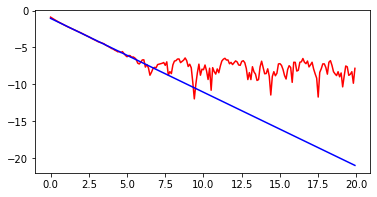

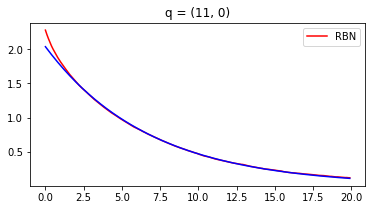

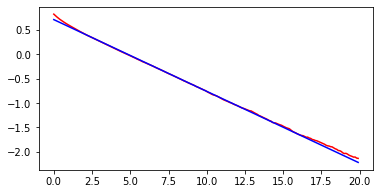

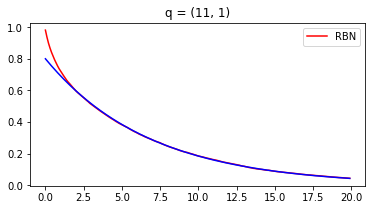

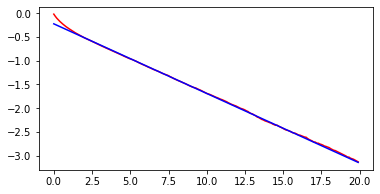

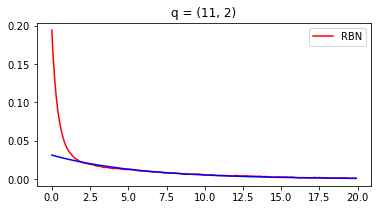

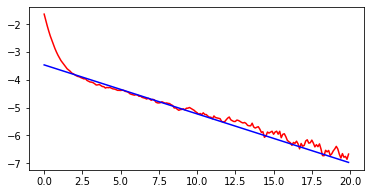

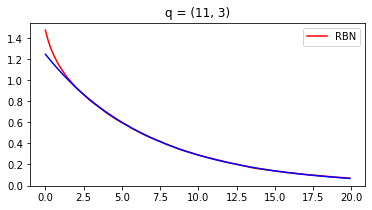

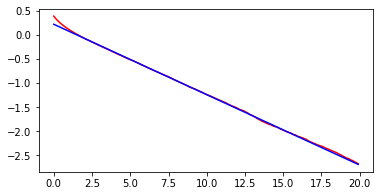

In [33]:
import scipy

fitting_energy_vison = []
index_list =[]
for i in range(12):
    for j in range(4):
        index = (i, j)
#         if index == (0, 0):
#             continue
        index_list.append(index)
        fig, ax = plt.subplots(1,figsize=(6, 3))
        
        ax.plot(t_list, np.abs(Vison_momentum[index].real), color='red', label='RBN')
        ax.set_title(f"q = {index}")
        ax.legend()
        params, _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  t_list[13:],  np.abs(Vison_momentum[index].real[13:]))
        ax.plot(t_list, params[0] * np.exp(-params[1]*t_list), color='blue', label='fitted')

        fig2, ax2 = plt.subplots(1,figsize=(6, 3))

        ax2.plot(t_list, np.log(np.abs(Vison_momentum[index].real)), color='red', label='RBN')
        ax2.plot(t_list, -params[1]*t_list + np.log(params[0]), color='blue', label = 'fitting')
        fitting_energy_vison.append(params[1])

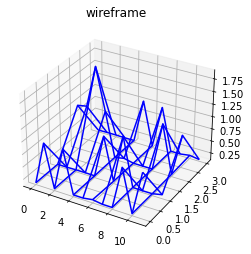

In [34]:
Z2 = np.array(fitting_energy_vison).reshape(4, 12)
from matplotlib import cm

x = np.arange(0, 3*length[0])
y = np.arange(0, 1*length[1])

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z2, color='blue')
ax.set_title('wireframe')
plt.show()

In [42]:
name = f'v={v} l={length}'
fig = go.Figure(data=[go.Surface(z=Z2, x=x, y=y)], layout=layout3d)
fig.update_layout(title=name, autosize=False,
                  width=700, height=700,)
fig.show()

### V = 0.9

In [79]:
dimer9 = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=0.9l=[4, 4]/dimer_real_mean_1.0e+05.npy")
dimer_momentum9 = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=0.9l=[4, 4]/dimer_momentum_mean_1.0e+05.npy")
Vison9 = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=0.9l=[4, 4]/vison_real_mean_1.0e+05.npy")
Vison_momentum9 = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=0.9l=[4, 4]/vison_momentum_mean_1.0e+05.npy")


<ipython-input-80-a923aacf0739>:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



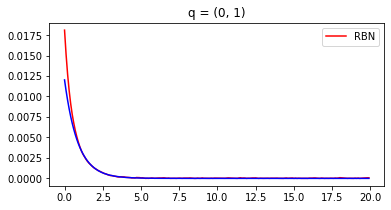

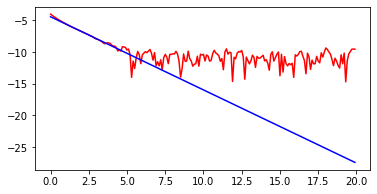

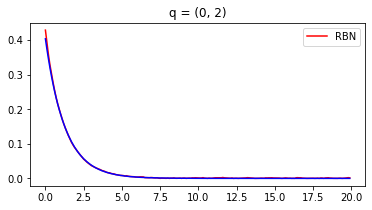

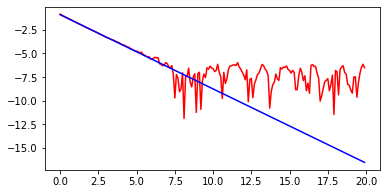

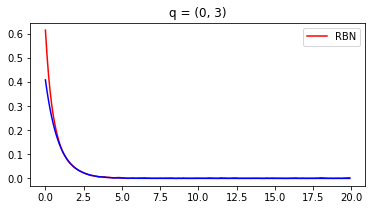

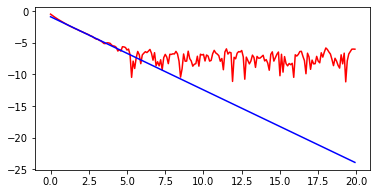

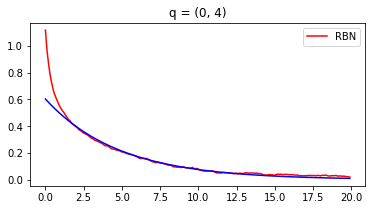

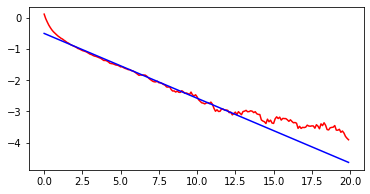

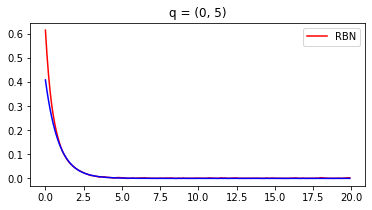

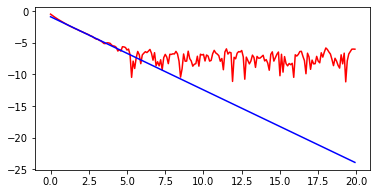

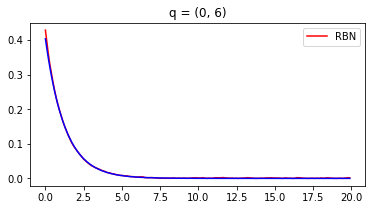

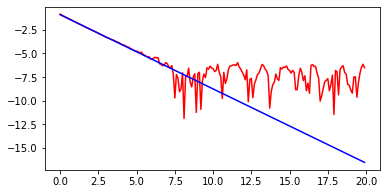

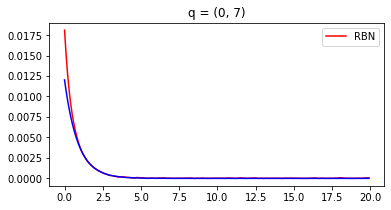

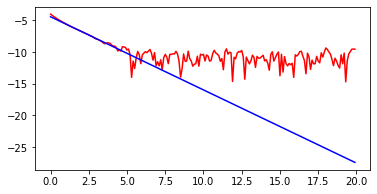

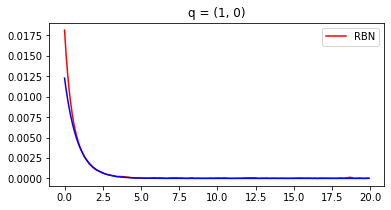

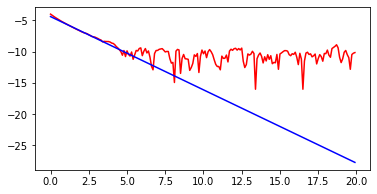

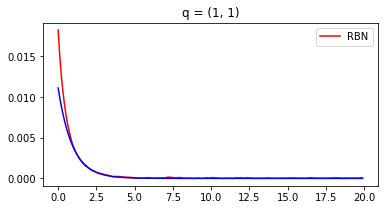

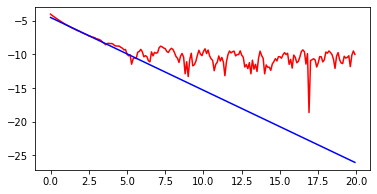

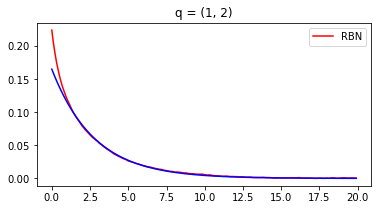

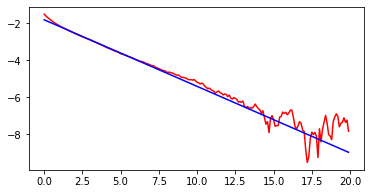

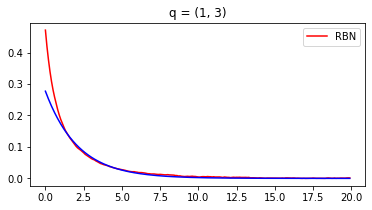

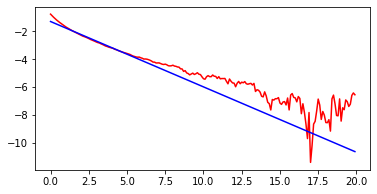

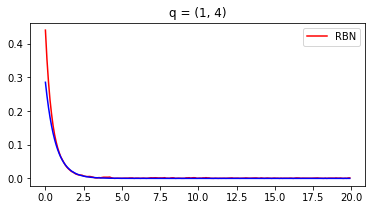

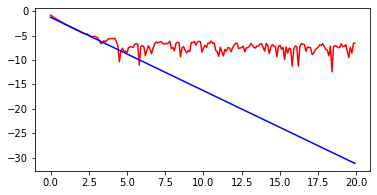

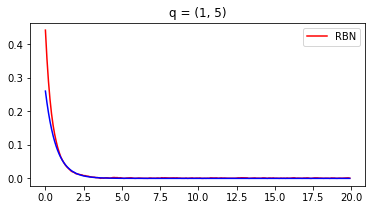

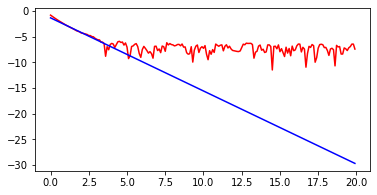

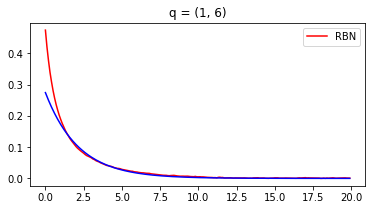

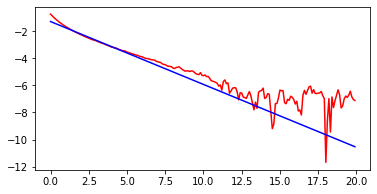

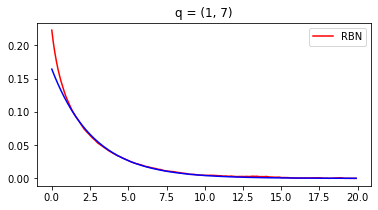

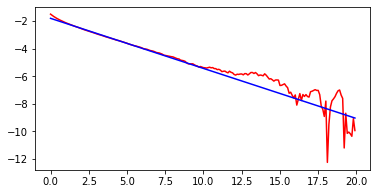

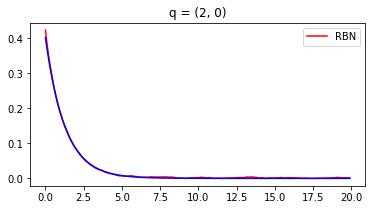

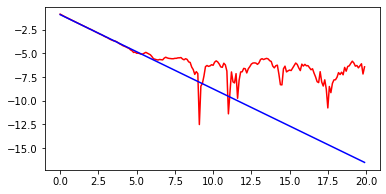

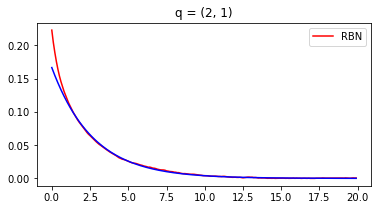

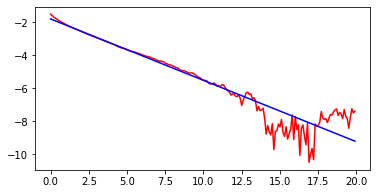

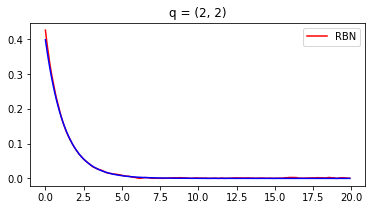

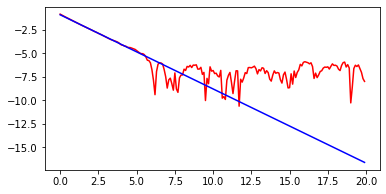

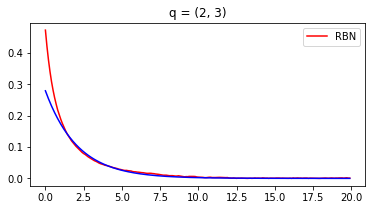

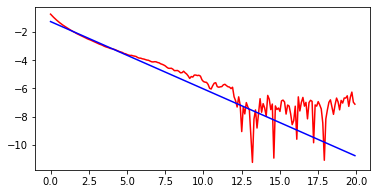

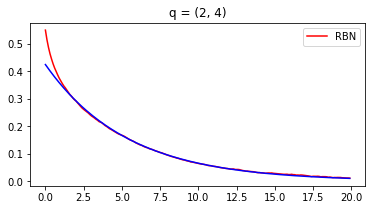

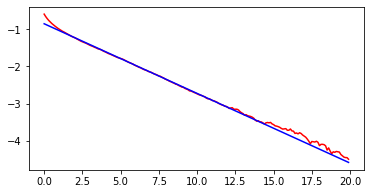

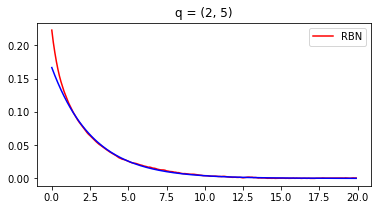

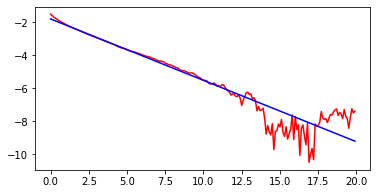

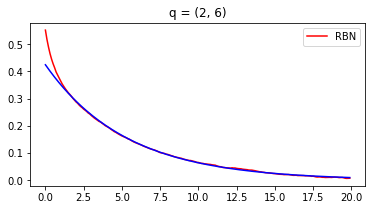

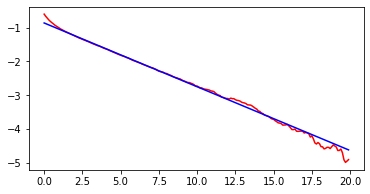

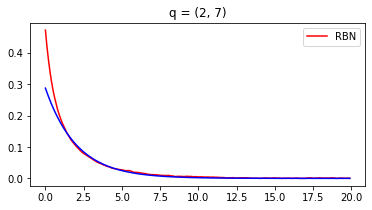

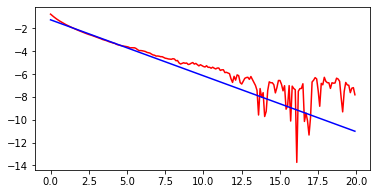

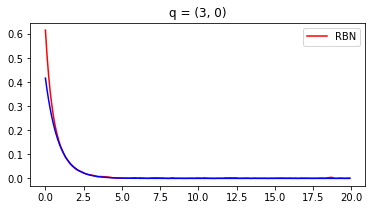

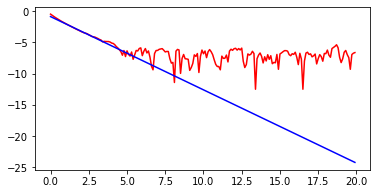

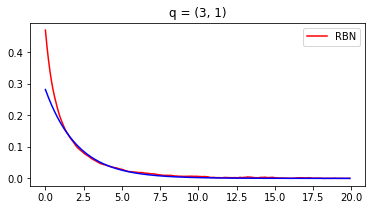

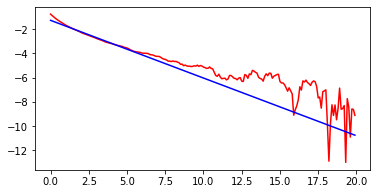

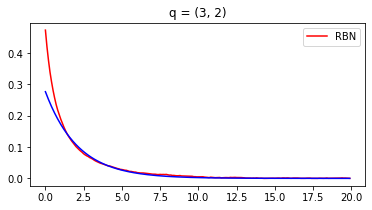

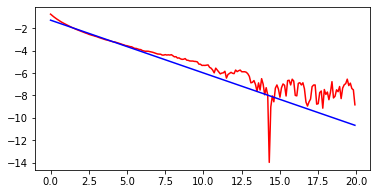

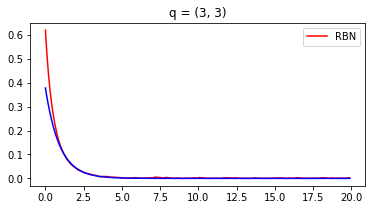

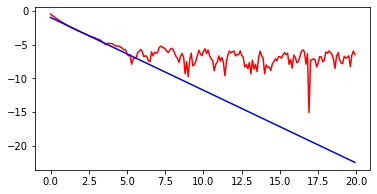

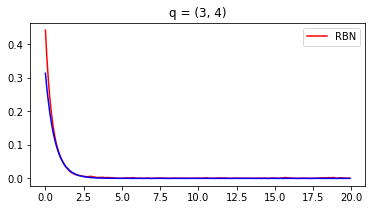

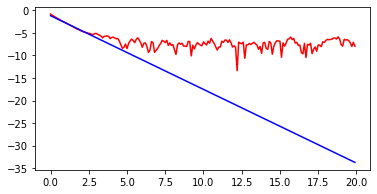

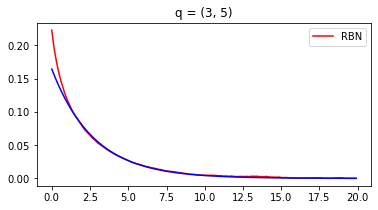

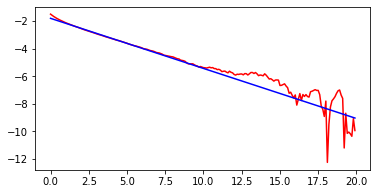

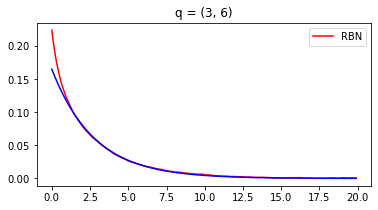

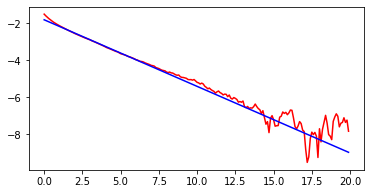

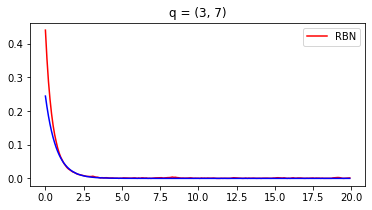

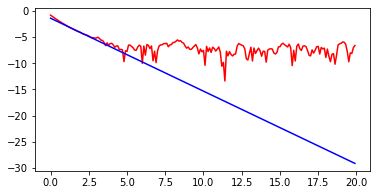

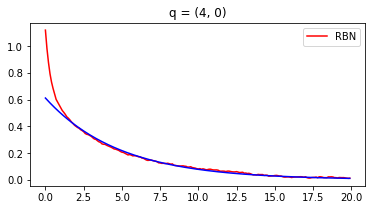

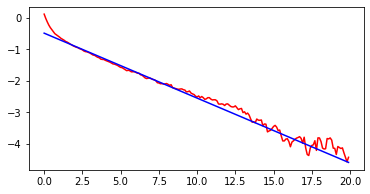

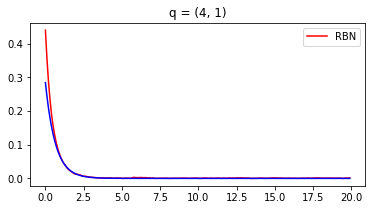

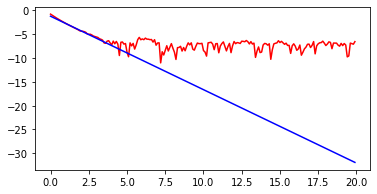

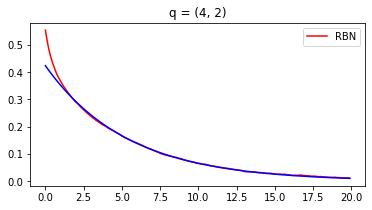

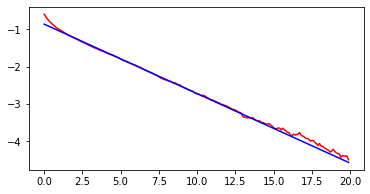

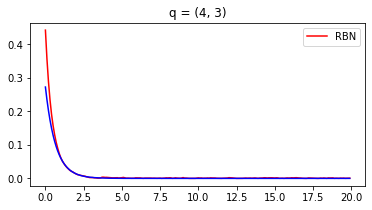

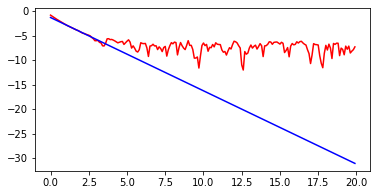

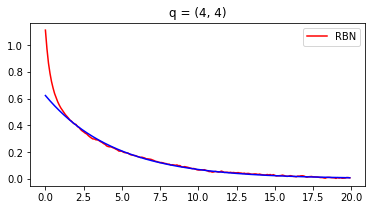

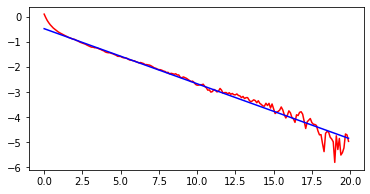

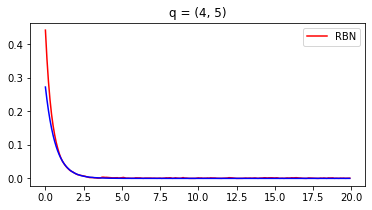

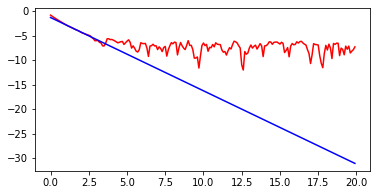

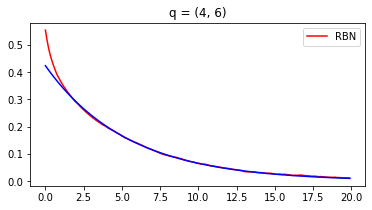

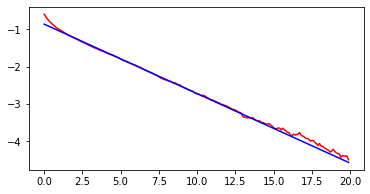

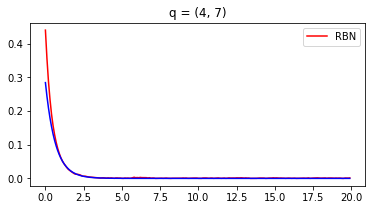

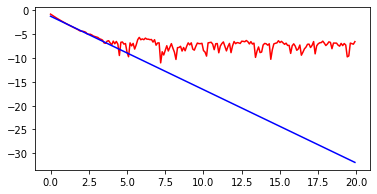

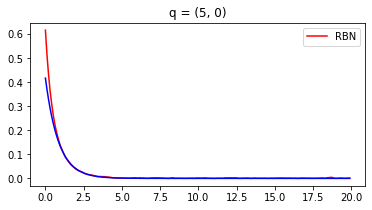

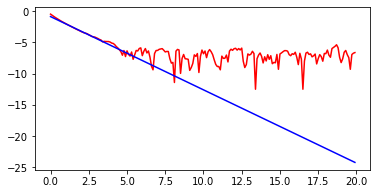

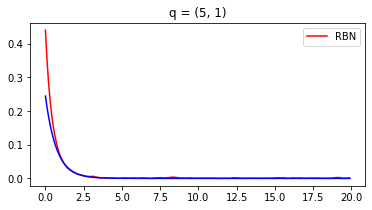

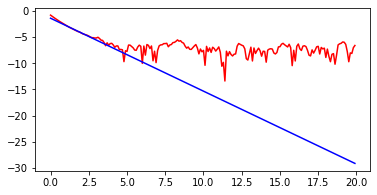

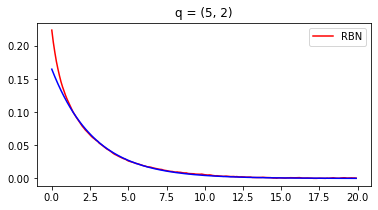

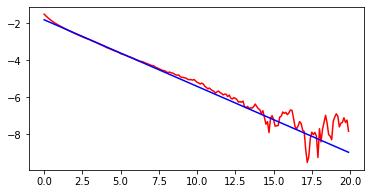

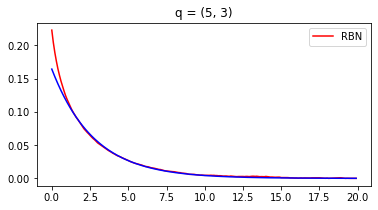

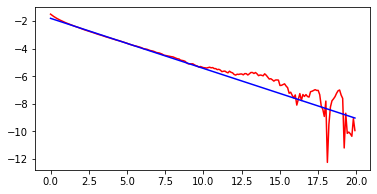

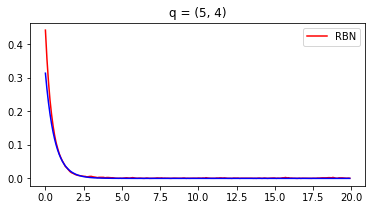

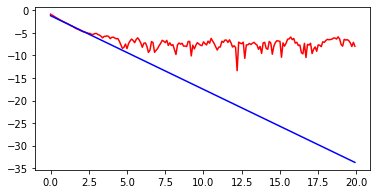

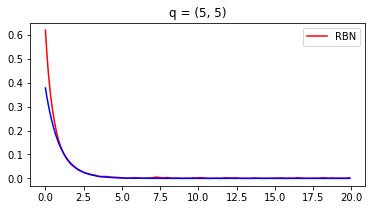

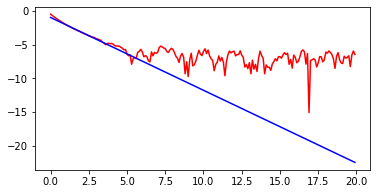

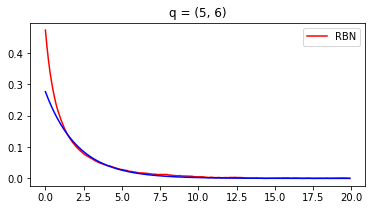

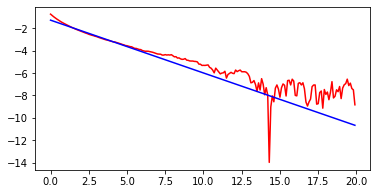

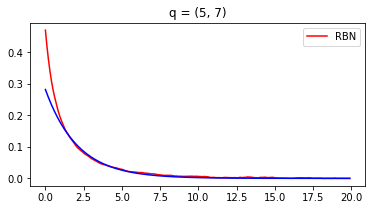

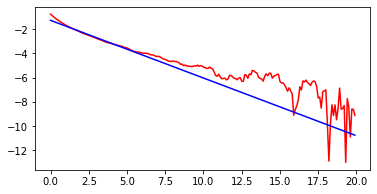

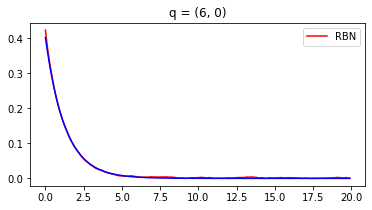

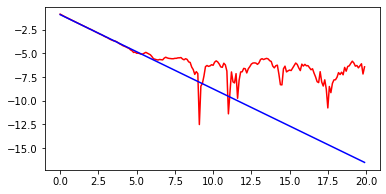

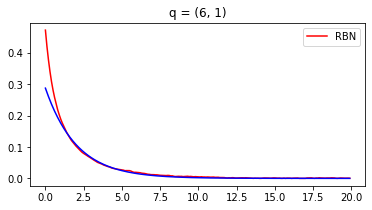

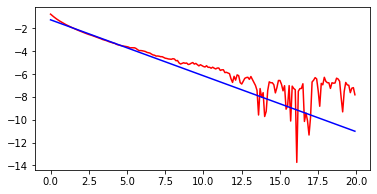

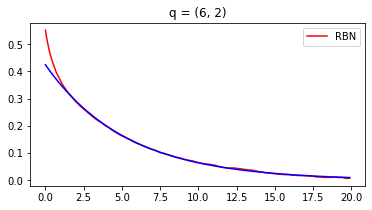

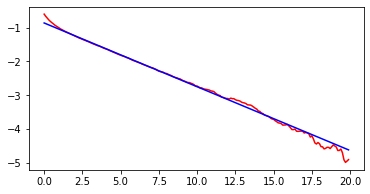

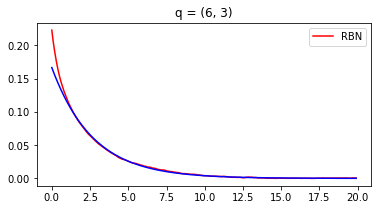

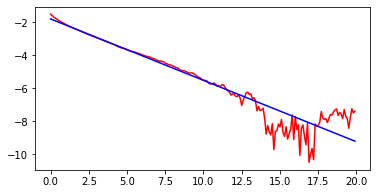

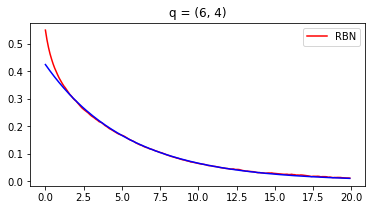

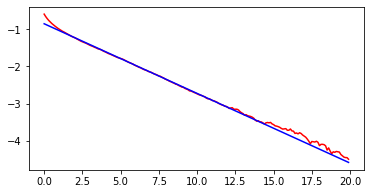

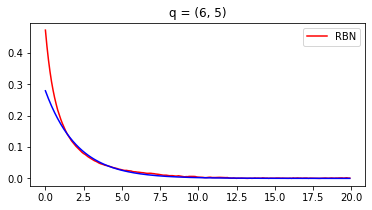

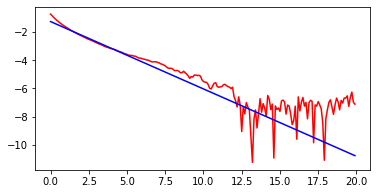

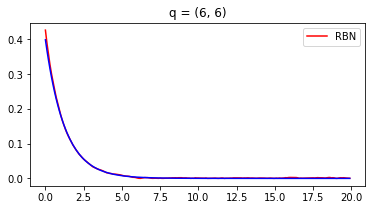

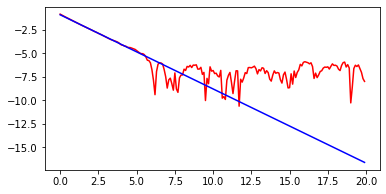

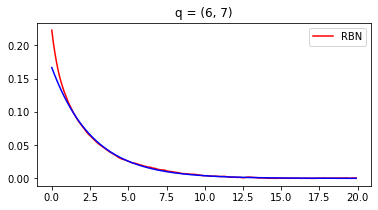

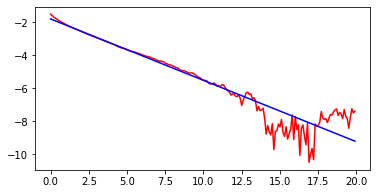

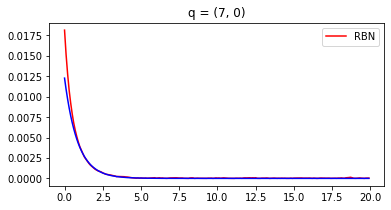

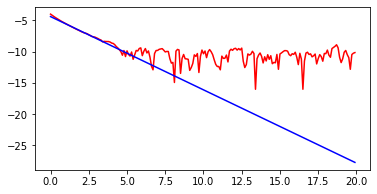

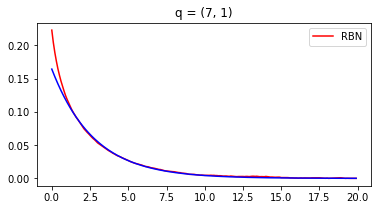

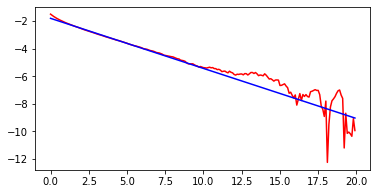

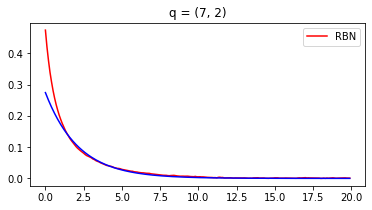

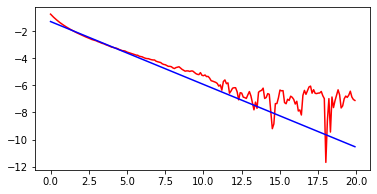

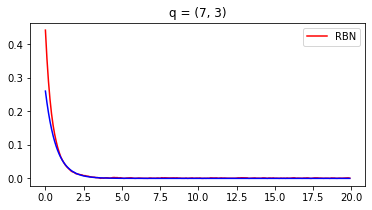

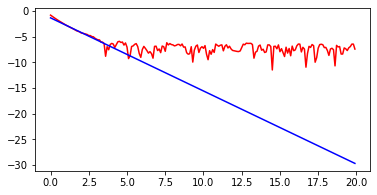

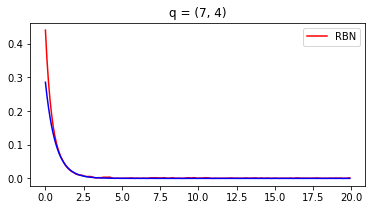

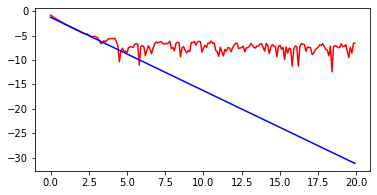

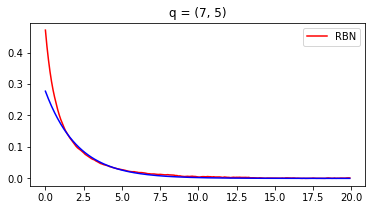

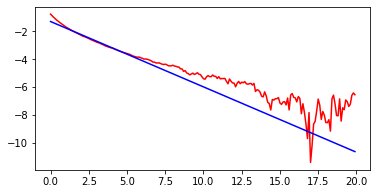

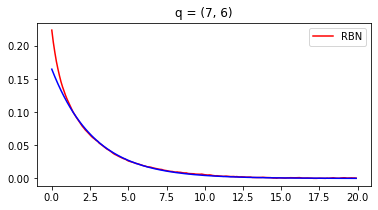

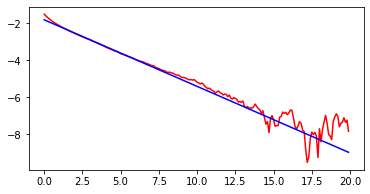

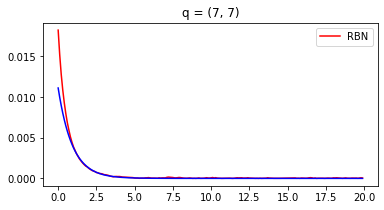

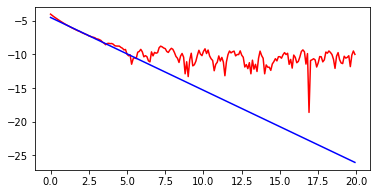

In [80]:
import scipy

fitting_energy2 = [-1]
index_list =[]
for i in range(8):
    for j in range(8):
        index = (i, j)
        if index == (0, 0):
            continue
        index_list.append(index)
        fig, ax = plt.subplots(1,figsize=(6, 3))
        
        ax.plot(t_list, np.abs(dimer_momentum9[index].real), color='red', label='RBN')
        ax.set_title(f"q = {index}")
        ax.legend()
        params, _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  t_list[10:],  np.abs(dimer_momentum9[index].real[10:]))
        ax.plot(t_list, params[0] * np.exp(-params[1]*t_list), color='blue', label='fitted')

        fig2, ax2 = plt.subplots(1,figsize=(6, 3))

        ax2.plot(t_list, np.log(np.abs(dimer_momentum9[index].real)), color='red', label='RBN')
        ax2.plot(t_list, -params[1]*t_list + np.log(params[0]), color='blue', label = 'fitting')
        fitting_energy2.append(params[1])
        


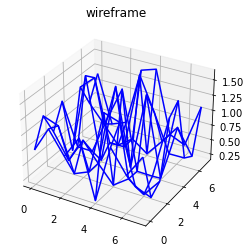

In [81]:
Z = np.array(fitting_energy2).reshape(8,8)
Z[0,0] = np.mean(Z)
from matplotlib import cm

x = np.arange(0, 2*length[0])
y = np.arange(0, 2*length[1])

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('wireframe')
plt.show()

In [82]:
v = 1
name = f'v={v} l={length}'
fig = go.Figure(data=[go.Surface(z=Z, x=x, y=y)])
fig.update_layout(title=name, autosize=False,
                  width=700, height=700,)
fig.show()

In [83]:
np.array(fitting_energy2)

array([-1.        ,  1.1548817 ,  0.78482676,  1.15488173,  0.20738717,
        1.15488173,  0.78482676,  1.1548817 ,  1.17160183,  1.0817313 ,
        0.35983643,  0.47074006,  1.50462845,  1.4236812 ,  0.46413957,
        0.36354586,  0.78405281,  0.37268915,  0.78898714,  0.47670297,
        0.18706551,  0.37268915,  0.18910936,  0.49045821,  1.1716025 ,
        0.47635193,  0.47104719,  1.08173169,  1.63717817,  0.36354587,
        0.35983644,  1.39409744,  0.20642531,  1.54073535,  0.18652552,
        1.49740567,  0.21937075,  1.49740564,  0.18652552,  1.54073532,
        1.17160251,  1.39409749,  0.35983643,  0.36354587,  1.63717819,
        1.08173167,  0.4710472 ,  0.47635193,  0.78405281,  0.49045821,
        0.18910936,  0.37268915,  0.18706551,  0.47670298,  0.78898714,
        0.37268915,  1.17160172,  0.36354587,  0.46413957,  1.42368119,
        1.50462844,  0.47074006,  0.35983643,  1.08173142])

In [85]:
np.array(fitting_energy)

array([-1.        ,  1.10328332,  0.90097277,  1.1032836 ,  0.23401201,
        1.1032836 ,  0.90097277,  1.10328332,  1.07061148,  1.0778636 ,
        0.33599185,  0.45912046,  1.32523927,  1.38010902,  0.44326039,
        0.3429967 ,  0.89935634,  0.34978007,  0.9471711 ,  0.46845583,
        0.18061602,  0.34978007,  0.18339749,  0.47619638,  1.07061172,
        0.44864001,  0.45613948,  1.07786376,  1.33544659,  0.34299671,
        0.33599186,  1.40528339,  0.21638276,  1.37536847,  0.18155261,
        1.55455635,  0.23084097,  1.55455622,  0.18155261,  1.37536835,
        1.0706117 ,  1.40528348,  0.33599185,  0.34299672,  1.33544654,
        1.07786374,  0.45613948,  0.44864   ,  0.89935634,  0.47619636,
        0.18339749,  0.34978007,  0.18061602,  0.46845584,  0.9471711 ,
        0.34978007,  1.0706116 ,  0.34299671,  0.4432604 ,  1.380109  ,
        1.32523928,  0.45912045,  0.33599185,  1.0778637 ])